In [1]:
import ezc3d 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os
import ID #import des fonctions spécifiques au notebook
from scipy.signal import find_peaks

In [2]:
def readMotionFile(filename):

    if not os.path.exists(filename):
        print('file do not exists')

    file_id = open(filename, 'r')

    # read header
    next_line = file_id.readline()
    header = [next_line]
    nc = 0
    nr = 0
    while not 'endheader' in next_line:
        if 'datacolumns' in next_line:
            nc = int(next_line[next_line.index(' ') + 1:len(next_line)])
        elif 'datarows' in next_line:
            nr = int(next_line[next_line.index(' ') + 1:len(next_line)])
    
        elif 'nColumns' in next_line:
            nc = int(next_line[next_line.index('=') + 1:len(next_line)])
        elif 'nRows' in next_line:
            nr = int(next_line[next_line.index('=') + 1:len(next_line)])

        next_line = file_id.readline()
        header.append(next_line)

    # process column labels
    next_line = file_id.readline()
    if next_line.isspace() == True:
        next_line = file_id.readline()

    labels = next_line.split()

    # get data
    data = []
    for i in range(1, nr + 1):
        d = [float(x) for x in file_id.readline().split()]
        data.append(d)

    file_id.close()

    return header, labels, data

In [3]:
def find_index(name,list):
    return list.index(name)

In [4]:
def analyse_angle(data):
    [h,l,d]=readMotionFile(data)

    #Création des conteneurs
    knee_flexion_l=np.zeros(len(d))
    knee_flexion_r=np.zeros(len(d))

    hip_flexion_r=np.zeros(len(d))
    hip_flexion_l=np.zeros(len(d))

    hip_adduction_r=np.zeros(len(d))
    hip_adduction_l=np.zeros(len(d))

    hip_rotation_r=np.zeros(len(d))
    hip_rotation_l=np.zeros(len(d))

    ankle_flexion_r=np.zeros(len(d))
    ankle_flexion_l=np.zeros(len(d))

    time=np.zeros(len(d))

    for i in range(len(d)):
        time[i]=d[i][0]
        knee_flexion_r[i]=d[i][find_index("knee_angle_r",l)]
        knee_flexion_l[i]=d[i][find_index("knee_angle_l",l)]

        hip_flexion_r[i]=d[i][find_index("hip_flexion_r",l)]
        hip_flexion_l[i]=d[i][find_index("hip_flexion_l",l)]

        hip_adduction_r[i]=d[i][find_index("hip_adduction_r",l)]
        hip_adduction_l[i]=d[i][find_index("hip_adduction_l",l)]

        hip_rotation_r[i]=d[i][find_index("hip_rotation_r",l)]
        hip_rotation_l[i]=d[i][find_index("hip_rotation_l",l)]

        ankle_flexion_r[i]=d[i][find_index("ankle_angle_r",l)]
        ankle_flexion_l[i]=d[i][find_index("ankle_angle_l",l)]    

    return knee_flexion_r,knee_flexion_l,hip_flexion_r,hip_flexion_l,hip_adduction_r,hip_adduction_l,hip_rotation_r,hip_rotation_l,ankle_flexion_r,ankle_flexion_l

[589 633 677 720 763 807 849 892 935]
[1171 1259 1347 1433 1520 1606 1692 1778 1863]
[1169 1258 1345 1432 1518 1605 1690 1776 1862]


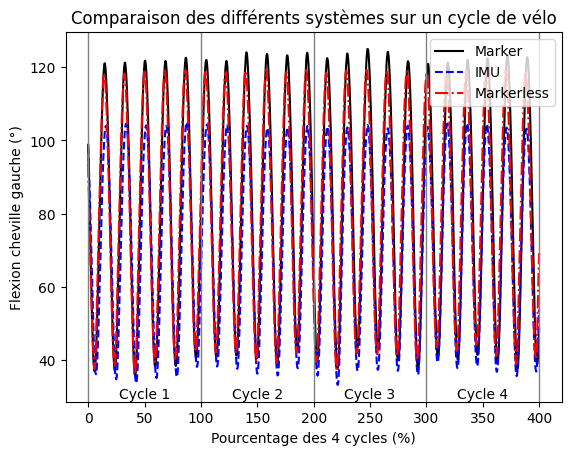

In [6]:
c = ezc3d.c3d("/Users/mathieubourgeois/Desktop/AnalyseIMU/C3DFilesIMU/Sujet_01/Sujet_01_velo_80.c3d", extract_forceplat_data=False)
point_data = c['data']['points']
point_labels = c['parameters']['POINT']['LABELS']
nf_mocap = len(point_data[0][0][:])
Of = np.zeros((nf_mocap, 3))
Of[:, 2] = 0.5 * (point_data[2][find_index("pRightMedMalleolus", point_labels["value"])][:] + point_data[2][find_index("pRightLatMalleolus", point_labels["value"])][:])
peaks = find_peaks(Of[:, 2], distance=10)
peaks_to_analyze = peaks[0][:-1][-9:]
print(peaks_to_analyze)
end_frame = peaks_to_analyze[-2]
start_frame = peaks_to_analyze[-6]
[knee_flexion_r,knee_flexion_l,hip_flexion_r,hip_flexion_l,hip_adduction_r,hip_adduction_l,hip_rotation_r,hip_rotation_l,ankle_flexion_r,ankle_flexion_l] = analyse_angle("/Users/mathieubourgeois/Desktop/AnalyseIMU/Traitement_IMU_xsens/Sujet_01/IKResults/Sujet_01_velo_80_Xsens_jointangle_q.mot")
cycleXsens = knee_flexion_l#[start_frame:end_frame + 1]

c = ezc3d.c3d("/Users/mathieubourgeois/Desktop/Analyse/C3DFiles/Sujet_01/Sujet_01_velo_80.c3d", extract_forceplat_data=False)
point_data = c['data']['points']
point_labels = c['parameters']['POINT']['LABELS']
nf_mocap = len(point_data[0][0][:])
Of = np.zeros((nf_mocap, 3))
Of[:, 2] = 0.5 * (point_data[2][find_index("RANI", point_labels["value"])][:] + point_data[2][find_index("RANE", point_labels["value"])][:])
peaks = find_peaks(Of[:, 2], distance=10)
peaks_to_analyze = peaks[0][:-1][-9:]
print(peaks_to_analyze)
end_frame = peaks_to_analyze[-2]
start_frame = peaks_to_analyze[-6]
[knee_flexion_r,knee_flexion_l,hip_flexion_r,hip_flexion_l,hip_adduction_r,hip_adduction_l,hip_rotation_r,hip_rotation_l,ankle_flexion_r,ankle_flexion_l] = analyse_angle("/Users/mathieubourgeois/Desktop/Analyse/Traitement_marker/Sujet_01/IKResults/Transformed_Sujet_01_velo_80_ik.mot")
cycleMarker = knee_flexion_l#[start_frame:end_frame + 1]

data = np.genfromtxt("/Users/mathieubourgeois/Desktop/Analyse_Markerless/Traitement_Markerless/Sujet_01/Data/OpenSimTheia_Sujet_01_velo_80_filt.trc", delimiter='\t', skip_header=5)
with open("/Users/mathieubourgeois/Desktop/Analyse_Markerless/Traitement_Markerless/Sujet_01/Data/OpenSimTheia_Sujet_01_velo_80_filt.trc", 'r') as file:
    headers = file.readlines()[3].strip().split('\t')
headers_list_cleaned = [item for item in headers if item]
col_index = (headers_list_cleaned.index('RAnkle'))-1
y_coordinates = data[:, col_index * 3 ]  # Colonne pour les coordonnées y de "RAnkle"
peaks = find_peaks(y_coordinates, distance=10)
peaks_to_analyze = peaks[0][:-1][-9:]
print(peaks_to_analyze)
end_frame = peaks_to_analyze[-2]
start_frame = peaks_to_analyze[-6]
[knee_flexion_r,knee_flexion_l,hip_flexion_r,hip_flexion_l,hip_adduction_r,hip_adduction_l,hip_rotation_r,hip_rotation_l,ankle_flexion_r,ankle_flexion_l] = analyse_angle("/Users/mathieubourgeois/Desktop/Analyse_Markerless/Traitement_Markerless/Sujet_01/IKResults/OpenSimTheia_Sujet_01_velo_80_filt_ik.mot")
cycleMarkerless = knee_flexion_l#[start_frame:end_frame + 1]

# Calculer les pourcentages pour les axes des abscisses
pourcentage_cycleMarker = np.linspace(0, 400, len(cycleMarker))
pourcentage_cycleXsens = np.linspace(0, 400, len(cycleXsens))
pourcentage_cycleMarkerless = np.linspace(0, 400, len(cycleMarkerless))

#chemin_dossier = '/Users/mathieubourgeois/Desktop/Plot_memoire'
#nom_fichier = 'ankle_flexion_l.png'

positions_cycles = [0, 100, 200, 300, 400]
etiquettes_cycles = ['Cycle 1', 'Cycle 2', 'Cycle 3', 'Cycle 4']

plt.plot(pourcentage_cycleMarker, cycleMarker, color='black', label='Marker')
plt.plot(pourcentage_cycleXsens, cycleXsens, color='blue', linestyle='--', label='IMU')
plt.plot(pourcentage_cycleMarkerless, cycleMarkerless, color='red', linestyle='-.', label='Markerless')
for i, position in enumerate(positions_cycles[:-1]):
    plt.axvline(x=position, color='gray', linestyle='-', linewidth=1)
    plt.text(position + (positions_cycles[i+1] - position)/2, plt.ylim()[0], etiquettes_cycles[i],
             color='black', ha='center', va='bottom')
plt.axvline(x=400, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Pourcentage des 4 cycles (%)')
plt.ylabel('Flexion cheville gauche (°)')
plt.title('Comparaison des différents systèmes sur un cycle de vélo')
plt.legend(loc='upper right')
#plt.grid(True)
#plt.savefig(chemin_dossier + '/' + nom_fichier)

plt.show()

